In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv('./data/train.csv')
df

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,Absence
629996,629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,Absence
629997,629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,Presence
629998,629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,Presence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [4]:
df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [5]:
df.isnull().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# #Univariate analysis

In [7]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

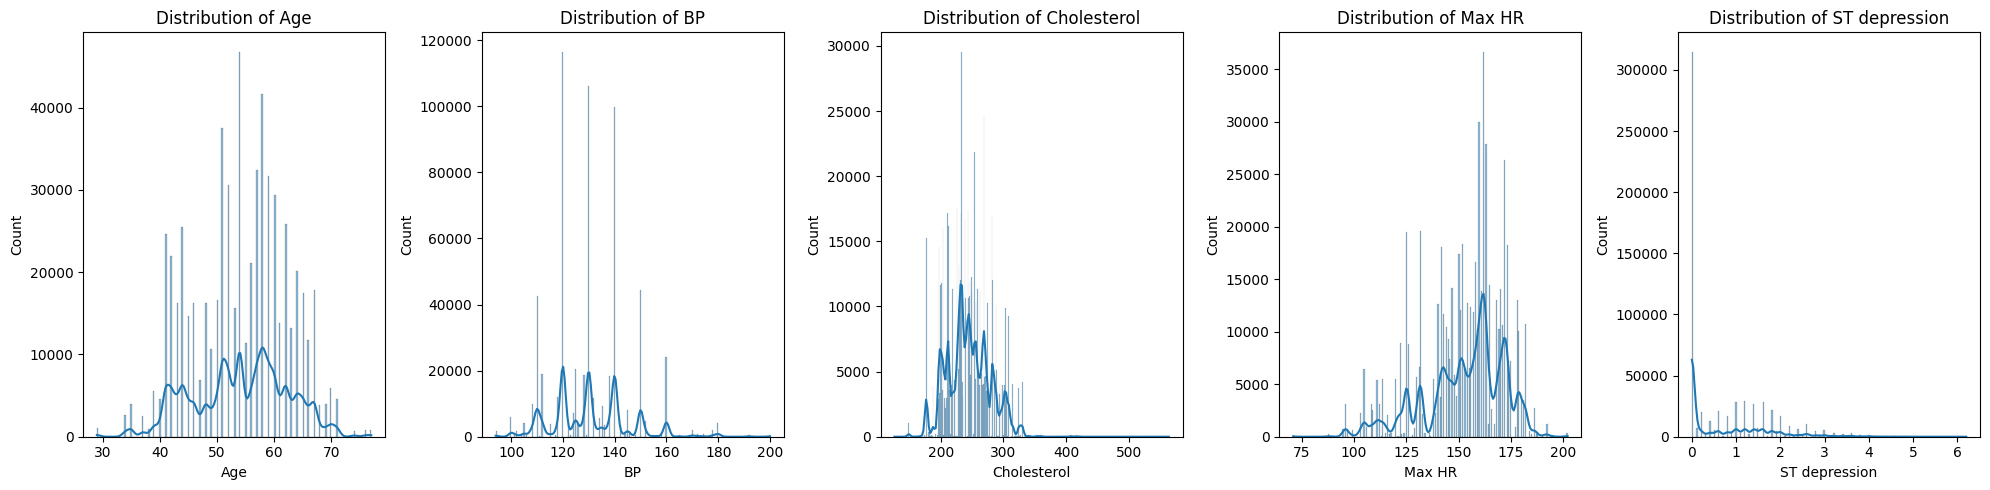

In [8]:
num_cols = ['Age','BP', 'Cholesterol', 'Max HR', 'ST depression']
fig, ax = plt.subplots(1, len(num_cols), figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

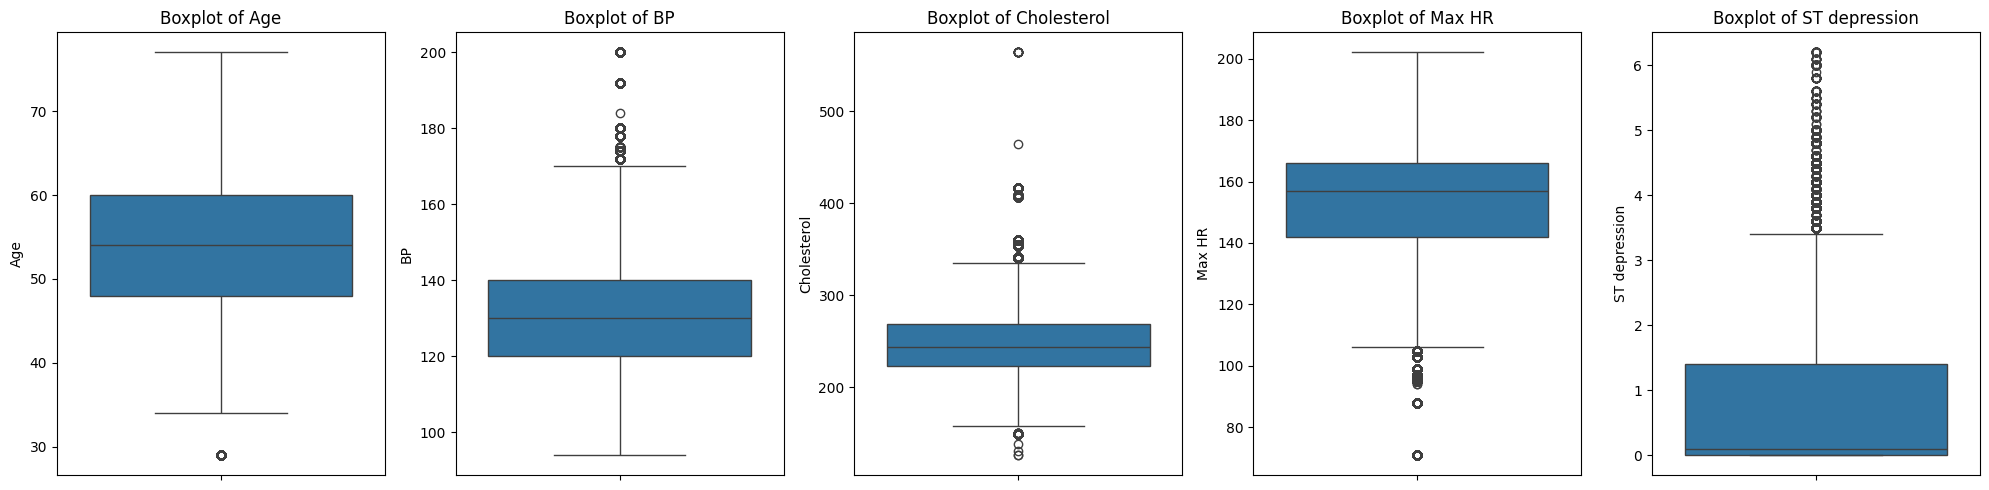

In [9]:
#boxplot
fig, ax = plt.subplots(1, len(num_cols), figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [10]:
df[num_cols].describe()

,Age,BP,Cholesterol,Max HR,ST depression
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,130.497433,245.011814,152.816763,0.716028
std,8.256301,14.975802,33.681581,19.112927,0.948472
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,223.000000,142.000000,0.000000
50%,54.000000,130.000000,243.000000,157.000000,0.100000
75%,60.000000,140.000000,269.000000,166.000000,1.400000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [11]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

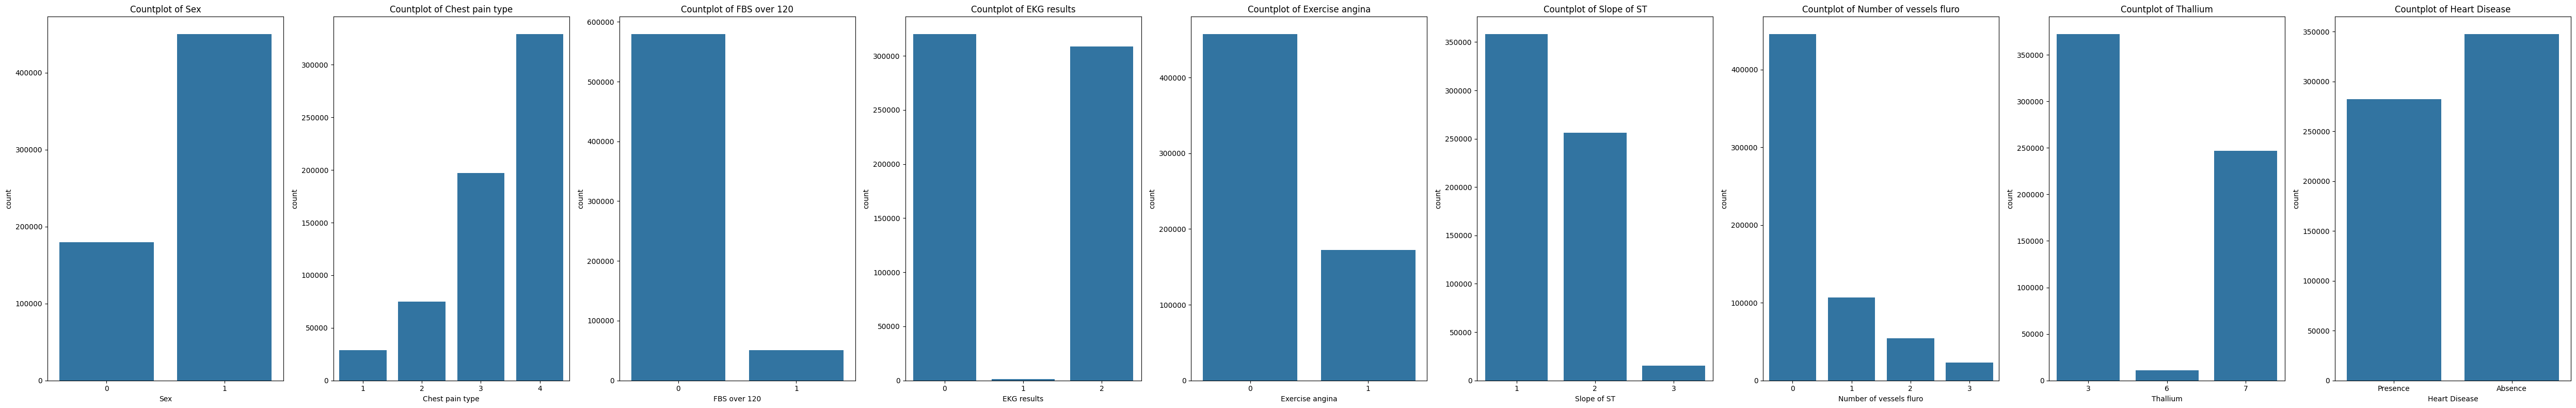

In [12]:
#categorical columns
cat_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',  'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

fig, ax = plt.subplots(1, len(cat_cols), figsize=(50, 8))
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=ax[i])
    ax[i].set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

# Bivariate analysis

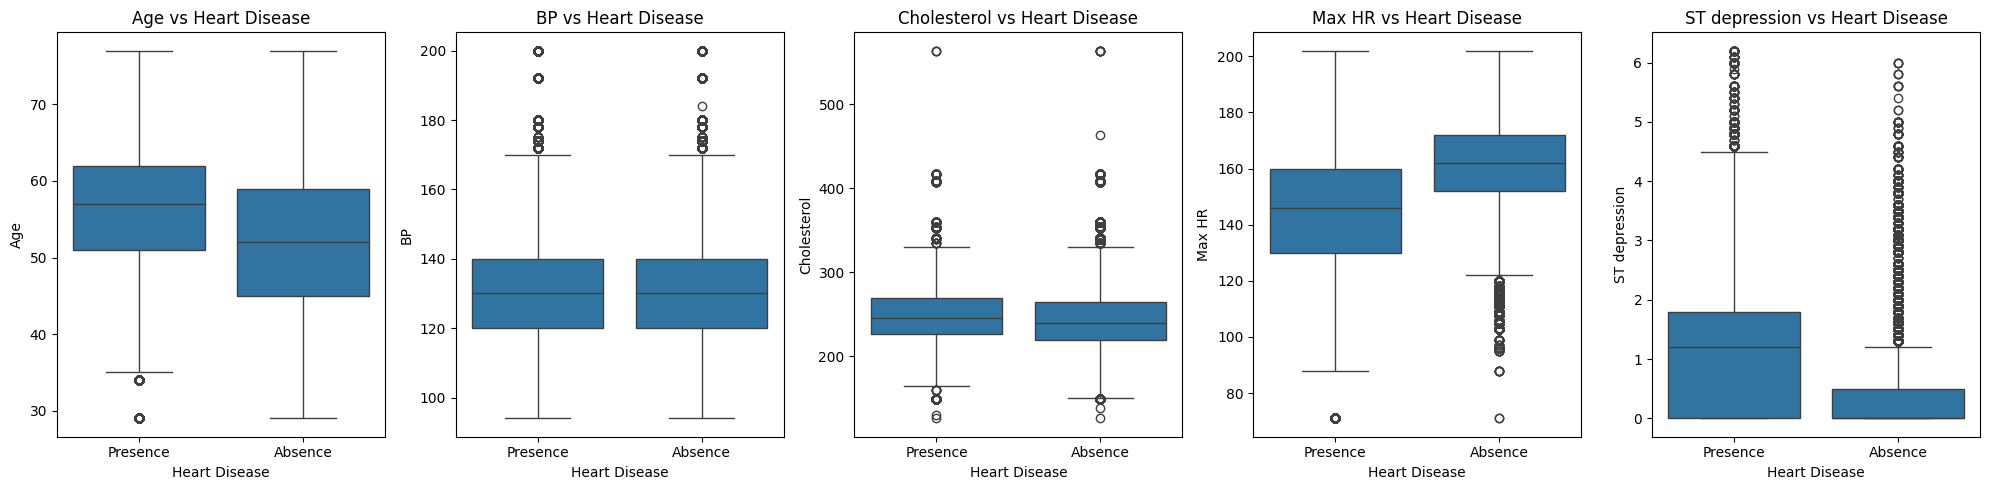

In [13]:
#Num_cols vs Target
fig, ax = plt.subplots(1, len(num_cols), figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(x=df['Heart Disease'], y=df[col], ax=ax[i])
    ax[i].set_title(f'{col} vs Heart Disease')
plt.tight_layout()
plt.show()

In [14]:
#Hypothesis Testing

for col in num_cols:
    group1 = df[df['Heart Disease'] == 'Presence'][col]
    group2 = df[df['Heart Disease'] == 'Absence'][col]

    t_stat, p_value = stats.ttest_ind(group1, group2)

    print(f"{col}: p-value = {p_value  }")

Age: p-value = 0.0
BP: p-value = 3.91682775270394e-05
Cholesterol: p-value = 0.0
Max HR: p-value = 0.0
ST depression: p-value = 0.0


In [15]:
#effect size 
def cohens_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt(
        (np.var(x) + np.var(y)) / 2
    )

for col in num_cols:
    g1 = df[df['Heart Disease']=='Presence'][col]
    g2 = df[df['Heart Disease']=='Absence'][col]
    print(col, cohens_d(g1, g2))

Age 0.437890726487031
BP -0.010430868832908736
Cholesterol 0.1672665400574902
Max HR -0.973406366550824
ST depression 0.9355050572270542


Effect size analysis shows Max HR and ST depressions show signifcant predictive nature and other Age Show small difference and Cholesterol and BP shows very lower predictive nature

In [16]:
#Cat_cols vs Target
#percentage comparison
for col in cat_cols[:-1]:
    ct = pd.crosstab(df[col], df['Heart Disease'], normalize='index') * 100
    print(f"{col} vs Heart Disease:\n{ct}\n")

Sex vs Heart Disease:
Heart Disease    Absence   Presence
Sex                                
0              82.123561  17.876439
1              44.406740  55.593260

Chest pain type vs Heart Disease:
Heart Disease      Absence   Presence
Chest pain type                      
1                89.193063  10.806937
2                83.781908  16.218092
3                80.933505  19.066495
4                30.252234  69.747766

FBS over 120 vs Heart Disease:
Heart Disease    Absence   Presence
FBS over 120                       
0              55.658307  44.341693
1              49.503890  50.496110

EKG results vs Heart Disease:
Heart Disease    Absence   Presence
EKG results                        
0              65.850192  34.149808
1              63.993949  36.006051
2              44.043985  55.956015

Exercise angina vs Heart Disease:
Heart Disease      Absence   Presence
Exercise angina                      
0                68.656746  31.343254
1                19.371169  80.6288

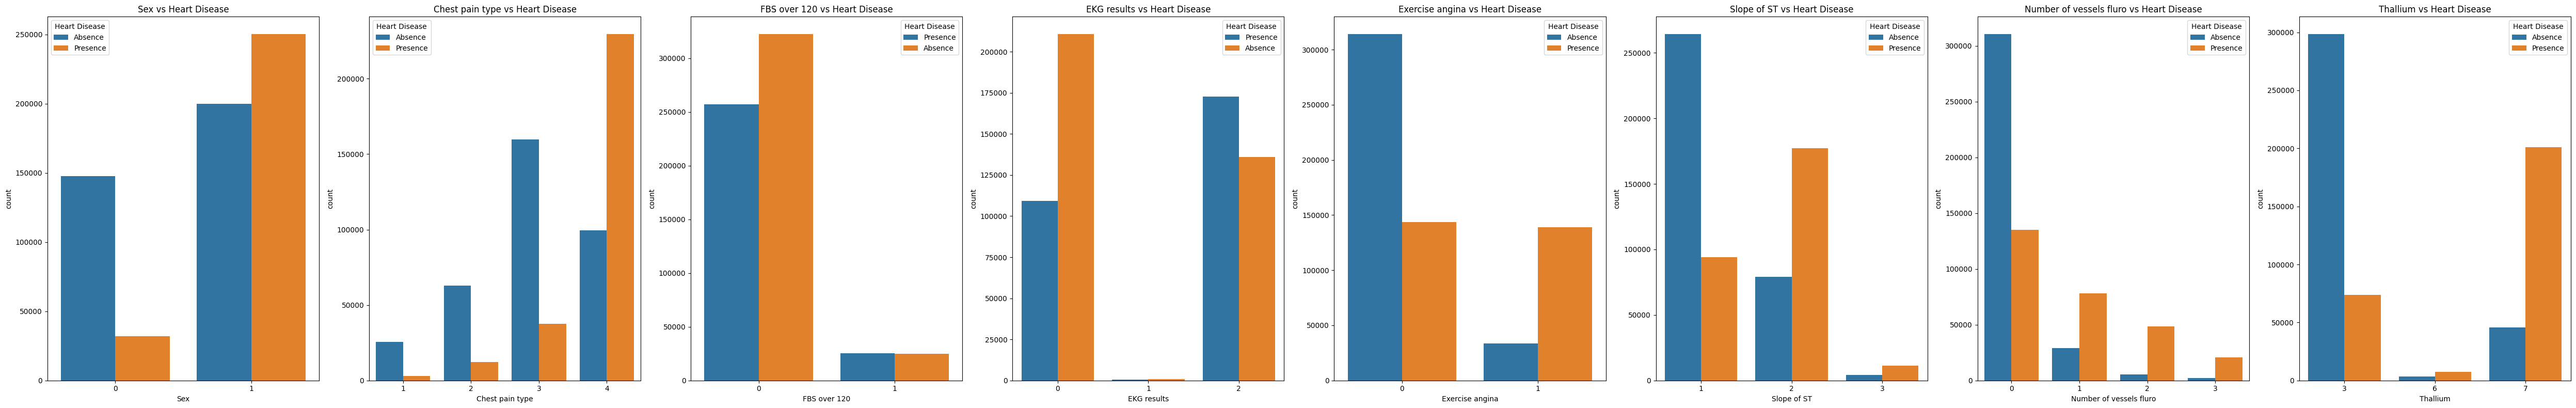

In [17]:
#countplot
fig, ax = plt.subplots(1, len(cat_cols[:-1]), figsize=(50, 8))
for i, col in enumerate(cat_cols[:-1]):
    sns.countplot(x=df[col], hue=df['Heart Disease'], ax=ax[i])
    ax[i].set_title(f'{col} vs Heart Disease')
plt.tight_layout()
plt.show()

In [18]:
#Statistical test
for col in cat_cols[:-1]:
    contigency_table = pd.crosstab(df[col], df['Heart Disease'])
    chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
    print(f"{col} vs Heart Disease: chi2 = {chi2}, p-value = {p}")

    n = contigency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contigency_table.shape)-1)))

    print("Cramer's V:", cramers_v)

Sex vs Heart Disease: chi2 = 73878.22248660644, p-value = 0.0
Cramer's V: 0.3424427248752851
Chest pain type vs Heart Disease: chi2 = 173770.66166460974, p-value = 0.0
Cramer's V: 0.5251918193257413
FBS over 120 vs Heart Disease: chi2 = 709.7381923785547, p-value = 2.2808195822739196e-156
Cramer's V: 0.03356439421963458
EKG results vs Heart Disease: chi2 = 30248.416204994788, p-value = 0.0
Cramer's V: 0.2191195086146993
Exercise angina vs Heart Disease: chi2 = 123001.44833069795, p-value = 0.0
Cramer's V: 0.4418601522831755
Slope of ST vs Heart Disease: chi2 = 116357.57938656045, p-value = 0.0
Cramer's V: 0.4297610620505979
Number of vessels fluro vs Heart Disease: chi2 = 135190.51824422987, p-value = 0.0
Cramer's V: 0.46323657476195707
Thallium vs Heart Disease: chi2 = 231215.69176720877, p-value = 0.0
Cramer's V: 0.6058127058350007


Heart disease occurrence in the dataset is strongly associated with clinical diagnostic indicators such as chest pain type, thallium test results, vessel blockage count, and exercise-induced angina.
Lifestyle or general measurements like fasting blood sugar show minimal discriminatory power compared to diagnostic cardiac measurements.

# Overall Bivariate result

Strong Predictors : Thallium test,Chest pain type,Number of vessels,Exercise angina,ST slope 

Moderate Predictors : Sex and EKG result

Weak Prdictor : FBS 

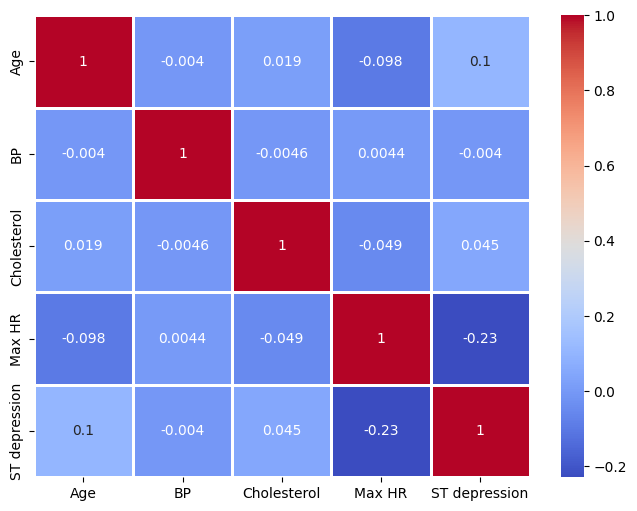

In [19]:
#Correlation Matrix

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(),
            annot=True,
            cmap='coolwarm', linewidths=1)
plt.show()


# Important Features

In [20]:
#random forest feature importance
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

model = RandomForestClassifier()
model.fit(X, y)

importance = pd.Series(
    model.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

print(importance)

Thallium                   0.208735
Chest pain type            0.138397
Max HR                     0.113023
id                         0.078942
Number of vessels fluro    0.075769
ST depression              0.065391
Cholesterol                0.063772
Age                        0.060486
Exercise angina            0.058597
BP                         0.046832
Slope of ST                0.046539
Sex                        0.028778
EKG results                0.010221
FBS over 120               0.004518
dtype: float64


All the features rather than (Id, FBS, EKG results) are important while predicting 

# VIF CHeck

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('Heart Disease', axis=1)
X = X.drop('id', axis=1, errors='ignore')


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature        VIF
3                        BP  56.627461
7                    Max HR  49.186843
4               Cholesterol  44.416204
0                       Age  39.219069
2           Chest pain type  18.483402
10              Slope of ST  10.566640
12                 Thallium   9.313990
1                       Sex   3.924358
9             ST depression   2.155124
6               EKG results   2.071019
8           Exercise angina   1.720810
11  Number of vessels fluro   1.629085
5              FBS over 120   1.089197


# Model Training

In [22]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (630000, 15)
Test: (270000, 14)


In [23]:
X_train = train.drop(['Heart Disease', 'id'], axis=1)
y_train = train['Heart Disease']

X_test = test.drop('id', axis=1)

print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (630000, 13)
Training target shape: (630000,)
Test features shape: (270000, 13)


Target Transformation

In [24]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

y_train_encode = le.fit_transform(y_train)

In [25]:
y_train.head()

0    Presence
1     Absence
2     Absence
3     Absence
4    Presence
Name: Heart Disease, dtype: object

In [26]:
y_train_encode[:5]

array([1, 0, 0, 0, 1])

Features scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original Training data: ")
print(X_train.iloc[0])
print("\n Scaled Training data: ")
print(X_train_scaled[0])

Original Training data: 
Age                         58.0
Sex                          1.0
Chest pain type              4.0
BP                         152.0
Cholesterol                239.0
FBS over 120                 0.0
EKG results                  0.0
Max HR                     158.0
Exercise angina              1.0
ST depression                3.6
Slope of ST                  2.0
Number of vessels fluro      2.0
Thallium                     7.0
Name: 0, dtype: float64

 Scaled Training data: 
[ 0.46792102  0.63175953  0.80699435  1.43582185 -0.17848981 -0.29485847
 -0.98285756  0.27119032  1.62889422  3.04065451  0.99805061  1.93972073
  1.22108704]


Training first Model (Logistic Regression)

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_scaled, y_train_encode)

print("Model Trained Succesfully")
print("Model Coefficients : \n")
for feature, coef in zip(X_train.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")




Model Trained Succesfully
Model Coefficients : 

Age: 0.3519928150436977
Sex: 0.4834953216384541
Chest pain type: 0.8882172620989459
BP: 0.004112567773222131
Cholesterol: 0.0967287420029248
FBS over 120: -0.010941317683369502
EKG results: 0.21888393225650707
Max HR: -0.8377765598494867
Exercise angina: 0.5419058118905009
ST depression: 0.4623357708328174
Slope of ST: 0.44424125699017486
Number of vessels fluro: 0.7054310678298585
Thallium: 0.9634761522716336


Predicting on test data

In [29]:
y_prediction = log_reg.predict(X_test_scaled)

y_prediction_probability = log_reg.predict_proba(X_test_scaled)

print("First 10 predictions: ", y_prediction[:10])
print("First 10 prediction with probabilities: ")
for i in range(10):
    print(f"Sample {i} : Predict {le.inverse_transform([y_prediction[i]])[0]}"
          f"(Probability Absence: {y_prediction_probability[i][0]:.4f}, "
          f"Probability Presence: {y_prediction_probability[i][1]:.4f})"
          )

First 10 predictions:  [1 0 1 0 0 1 0 1 1 0]
First 10 prediction with probabilities: 
Sample 0 : Predict Presence(Probability Absence: 0.0331, Probability Presence: 0.9669)
Sample 1 : Predict Absence(Probability Absence: 0.9969, Probability Presence: 0.0031)
Sample 2 : Predict Presence(Probability Absence: 0.0060, Probability Presence: 0.9940)
Sample 3 : Predict Absence(Probability Absence: 0.9909, Probability Presence: 0.0091)
Sample 4 : Predict Absence(Probability Absence: 0.8846, Probability Presence: 0.1154)
Sample 5 : Predict Presence(Probability Absence: 0.0130, Probability Presence: 0.9870)
Sample 6 : Predict Absence(Probability Absence: 0.9845, Probability Presence: 0.0155)
Sample 7 : Predict Presence(Probability Absence: 0.3823, Probability Presence: 0.6177)
Sample 8 : Predict Presence(Probability Absence: 0.0066, Probability Presence: 0.9934)
Sample 9 : Predict Absence(Probability Absence: 0.9767, Probability Presence: 0.0233)


Validation

In [30]:
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled,
    y_train_encode,
    test_size=0.2,
    random_state=42,
    stratify=y_train_encode
)

In [31]:
print(f'Training set: {X_train_split.shape},\n Validation set: {X_val.shape}')

Training set: (504000, 13),
 Validation set: (126000, 13)


In [32]:
print("Training set class distribution: ")
print(pd.Series(y_train_split).value_counts(normalize=True))

print("Validation set class distribution: ")
print(pd.Series(y_val).value_counts(normalize=True))


Training set class distribution: 
0    0.551661
1    0.448339
Name: proportion, dtype: float64
Validation set class distribution: 
0    0.551659
1    0.448341
Name: proportion, dtype: float64


In [33]:
log_reg_val = LogisticRegression(random_state=42)
log_reg_val.fit(X_train_split, y_train_split)

print("Model trained for 80% of the data")


Model trained for 80% of the data


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# ---------------------------------
# 1️⃣ Recreate Features and Target
# ---------------------------------

X_full = df.drop(columns=["Heart Disease", "id"])
y_full = df["Heart Disease"]

# If your target is text ("Absence", "Presence")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_full = le.fit_transform(y_full)

# ---------------------------------
# 2️⃣ Create Final Deployment Pipeline
# ---------------------------------

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(random_state=42))
])

# Train on FULL dataset
final_pipeline.fit(X_full, y_full)

# ---------------------------------
# 3️⃣ Save Model
# ---------------------------------

joblib.dump(final_pipeline, "heart_model.pkl")

print("✅ Final deployment model saved successfully!")

✅ Final deployment model saved successfully!


In [35]:
# Make predictions on validation set
y_val_pred = log_reg_val.predict(X_val)
y_val_proba = log_reg_val.predict_proba(X_val)

# Show first 10 predictions vs actual
print("First 10 validation samples (Predicted vs Actual):")
print("-" * 60)
for i in range(10):
    pred = le.inverse_transform([y_val_pred[i]])[0]
    actual = le.inverse_transform([y_val[i]])[0]
    prob_absence = y_val_proba[i][0]
    prob_presence = y_val_proba[i][1]
    correct = "✅" if pred == actual else "❌"
    
    print(f"Sample {i}: Predicted: {pred:8} | Actual: {actual:8} | "
          f"Confidence: {max(prob_absence, prob_presence)*100:.1f}% {correct}")

First 10 validation samples (Predicted vs Actual):
------------------------------------------------------------
Sample 0: Predicted: Absence  | Actual: Absence  | Confidence: 99.9% ✅
Sample 1: Predicted: Presence | Actual: Presence | Confidence: 99.8% ✅
Sample 2: Predicted: Presence | Actual: Presence | Confidence: 99.4% ✅
Sample 3: Predicted: Presence | Actual: Presence | Confidence: 97.8% ✅
Sample 4: Predicted: Presence | Actual: Presence | Confidence: 99.9% ✅
Sample 5: Predicted: Absence  | Actual: Absence  | Confidence: 99.0% ✅
Sample 6: Predicted: Absence  | Actual: Absence  | Confidence: 97.9% ✅
Sample 7: Predicted: Absence  | Actual: Absence  | Confidence: 91.2% ✅
Sample 8: Predicted: Absence  | Actual: Absence  | Confidence: 96.9% ✅
Sample 9: Predicted: Absence  | Actual: Absence  | Confidence: 96.2% ✅


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [37]:

# 1. Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {round(accuracy, 4)} ({round(accuracy*100, 2)}%)")


Validation Accuracy: 0.8847 (88.47%)


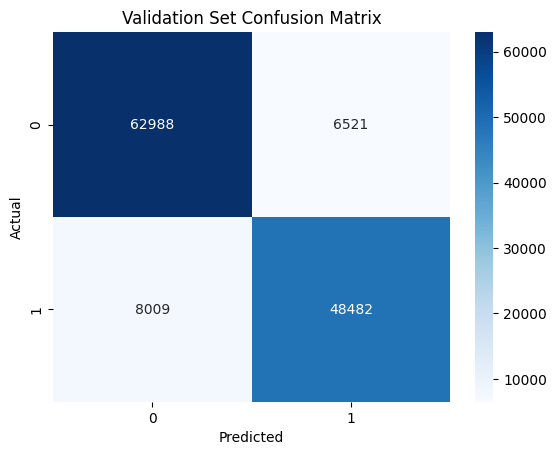

In [38]:

# 2. Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Set Confusion Matrix")
plt.show()


In [39]:

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))



Classification Report:
              precision    recall  f1-score   support

     Absence       0.89      0.91      0.90     69509
    Presence       0.88      0.86      0.87     56491

    accuracy                           0.88    126000
   macro avg       0.88      0.88      0.88    126000
weighted avg       0.88      0.88      0.88    126000



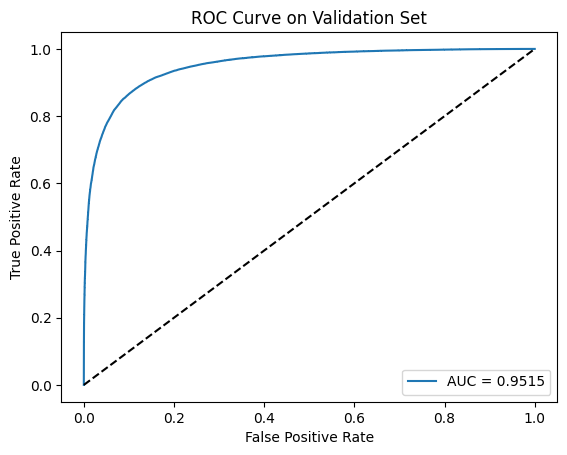

In [40]:

# 4. ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba[:,1])
auc = roc_auc_score(y_val, y_val_proba[:,1])
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Set')
plt.legend()
plt.show()